In [62]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

c:\Users\Hassan\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [54]:
data = pd.read_csv("Titanic-Dataset.csv")

<h1>Titanic</h1>
<p>The goal of this notebook is to discover the major causes of not surviving the titanic cateshpere</p>

In [55]:
display(data.head())
display(data.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

<h5>Handling Missing Values in Age, Cabin and Embarked</h5>

In [56]:
Embarked_categories = data["Embarked"].unique()

embarked_counts = {}
for emb in Embarked_categories[:-1]:
    emb_col = data[data["Embarked"] == emb]
    embarked_count = emb_col["Embarked"].count()
    print(f'{emb}: {embarked_count}')
    embarked_counts[emb] = embarked_count

#fill missing values with S (the most common value)
data["Embarked"] = data["Embarked"].fillna(max(embarked_counts))

S: 644
C: 168
Q: 77


In [ ]:
# Many missing values in Cabin
data = data.drop(columns=["Cabin"])

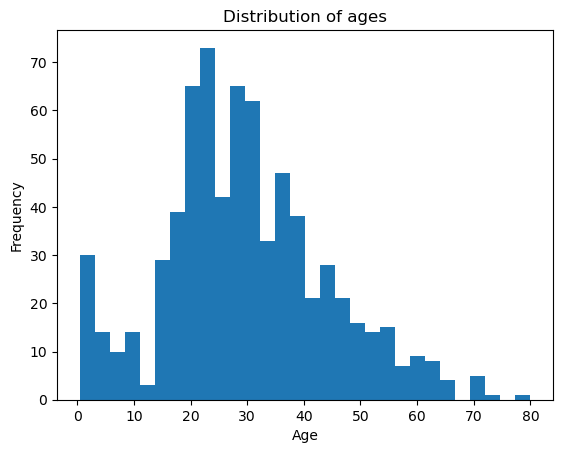

In [72]:
plt.hist(data["Age"], bins=30)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of ages")
plt.show()

The graph is right skewed, so it is better to use the median to fill NULL values.

In [81]:
age_median = data["Age"].median()
data["Age"] = data["Age"].fillna(age_median)

In [83]:
# All missing values are handled
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


None

<h5>Removing inconsistensies</h5>

In [92]:
print(data["Age"].describe())
print(data[data["Age"] < 0])  

print(data["Sex"].unique())
print(data["Embarked"].unique())
print(data["Pclass"].unique())

display(data[data["Fare"] <= 0])

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []
['male' 'female']
['S' 'C' 'Q']
[3 1 2]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,28.0,0,0,239853,0.0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,28.0,0,0,239853,0.0,S
466,467,0,2,"Campbell, Mr. William",male,28.0,0,0,239853,0.0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,239854,0.0,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,28.0,0,0,112052,0.0,S


In [ ]:
survived_col = data["Survived"]
survival_rate = survived_col[data["Survived"] == 1].count()/ survived_col.count() 
print("Survival Rate is %.2f%%" % (survival_rate*100))

Survival Rate is 38.38%


Fare == 0 most likely means missing